# Song2Vec - Word2Vec for non-NLP tasks
In this exercise you will apply the word2vec algorithm to a playlist dataset. In case you need help with the code, use the previous notebook and documentation

In [1]:
import pandas as pd
import numpy as np
import gensim as gen
from matplotlib import pyplot as plt
%matplotlib inline

First lets load the csv named **aotm2011_playlists.csv**. Examine the dataframe to understand you data, how many distinct songs are in the data? how many playlists? etc.

In [2]:
df = pd.read_csv('aotm2011_playlists.csv')
df.head(20)

,artist,category,playlist_id,song,user_id
0,peter murphy,Mixed Genre,89567.0,marlene dietrich's favourite poem,pulmotor
1,the walker brothers,Mixed Genre,89567.0,the sun ain't gonna shine anymore,pulmotor
2,marc almond,Mixed Genre,89567.0,jacky,pulmotor
3,tindersticks,Mixed Genre,89567.0,dying slowly,pulmotor
4,tori amos,Mixed Genre,89567.0,me and a gun,pulmotor
5,suzanne vega,Mixed Genre,89567.0,luka,pulmotor
6,madonna,Mixed Genre,89567.0,spanish eyes,pulmotor
7,the angels of light,Mixed Genre,89567.0,praise your name,pulmotor
8,eurythmics,Mixed Genre,89567.0,sex crime,pulmotor
9,tom waits,Mixed Genre,89567.0,drunk on the moon,pulmotor


In [3]:
print("There are {} songs".format(df['song'].nunique()))

There are 504985 songs


In [4]:
print("There are {} playlists".format(df['playlist_id'].nunique()))

There are 101264 playlists


In [5]:
df['song'] = df['song'].apply(str)

In [6]:
df['artist'] = df['artist'].apply(str)

## Song Similarity
Now we will try to create a song similarity model based on Word2Vec. Think how to compose your sentences, what are your words?

In [7]:
class SentenceGenerator(object):
    def __init__(self, series):
        self.playlists = series.tolist()
        
    def __iter__(self):
        for title in self.playlists:
            yield title

In [8]:
playlists = pd.DataFrame(df.groupby('playlist_id')['song'].apply(list)) 

In [9]:
sentences = SentenceGenerator(playlists['song'])

In [10]:
model = gen.models.Word2Vec(size=100, window=5, min_count=1, workers=4)

In [11]:
model.build_vocab(sentences)

In [12]:
model.train(sentences, total_examples = model.corpus_count, epochs = model.epochs)

(9937047, 9950110)

Test different songs, how would rate the results? If mediocre or below, why do you think that is?

In [13]:
model.wv.most_similar("luka", topn=10)

[('alone', 0.9999526739120483),
 ('forever', 0.9999510049819946),
 ('instant pleasure', 0.999949038028717),
 ('save yourself', 0.9999487400054932),
 ('mexico', 0.9999487400054932),
 ('shiver', 0.9999477863311768),
 ('hands down', 0.9999476075172424),
 ("don't know why", 0.999947190284729),
 ('safe and sound', 0.9999469518661499),
 ('africa', 0.9999468326568604)]

The song names seem to have nothing in common. This is most likely because song names are long and complex and can have words in common in the vocabulary without necessarily being similar songs.

Create another model for artist similarity. Do the results look better than song similarity? Why?

In [14]:
artists = pd.DataFrame(df.groupby('playlist_id')['artist'].apply(list))

In [15]:
sentences = SentenceGenerator(artists['artist'])

In [16]:
model2 = gen.models.Word2Vec(size=100, window=5, min_count=1, workers=4)

In [17]:
model2.build_vocab(sentences)

In [18]:
model2.train(sentences, total_examples = model2.corpus_count, epochs = model2.epochs)

(9834389, 9950110)

In [19]:
model2.wv.most_similar("madonna", topn=10)

[('george michael', 0.9454783201217651),
 ('the divinyls', 0.9183189272880554),
 ('max sharam', 0.9084584712982178),
 ('yazza pistachio', 0.9048500061035156),
 ('macy gray', 0.9032750129699707),
 ('pat benatar', 0.8994899988174438),
 ('white town', 0.8991259336471558),
 ('cyndi lauper', 0.897653341293335),
 ('berlin', 0.8936161994934082),
 ('rockwell [w/michael jackson]', 0.8904864192008972)]

Yes they do look better. I beleive that this is because artist names are more unique and simpler. They have less in common than song names do.

Create a TSNE plot for at least 10 different artists

/Users/Yohan/Desktop/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


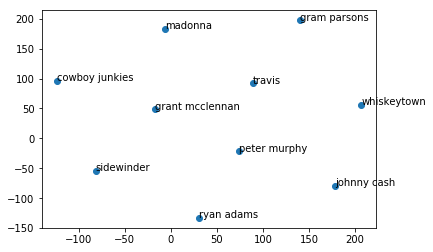

In [20]:
from sklearn.manifold import TSNE
artists = ['peter murphy','madonna', 'travis', 'johnny cash', 'ryan adams', 'gram parsons', 'cowboy junkies', 'sidewinder', 'grant mcclennan', 'whiskeytown']
X = np.stack([model2[name] for name in artists]) 
tsne = TSNE(n_components=2, random_state=12)
coords = tsne.fit_transform(X)
x = [x[0] for x in coords]
y = [x[1] for x in coords]
plt.scatter(x, y)
ax = plt.gca()
for i, artists in enumerate(artists):
    ax.annotate(artists, (x[i],y[i]))
plt.show()